In [230]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Proximity
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.loci import LOCI
from pyod.models.abod import ABOD
from pyod.models.hbos import HBOS
from pyod.models.sos import SOS

# Ensemble
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.iforest import IForest
from pyod.models.combination import aom
from pyod.models.combination import moa
from pyod.models.xgbod import XGBOD
from pyod.models.lscp import LSCP

# Linear
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.mcd import MCD

from scipy import stats
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("Superstore.xls")

In [4]:
df.shape

(9994, 21)

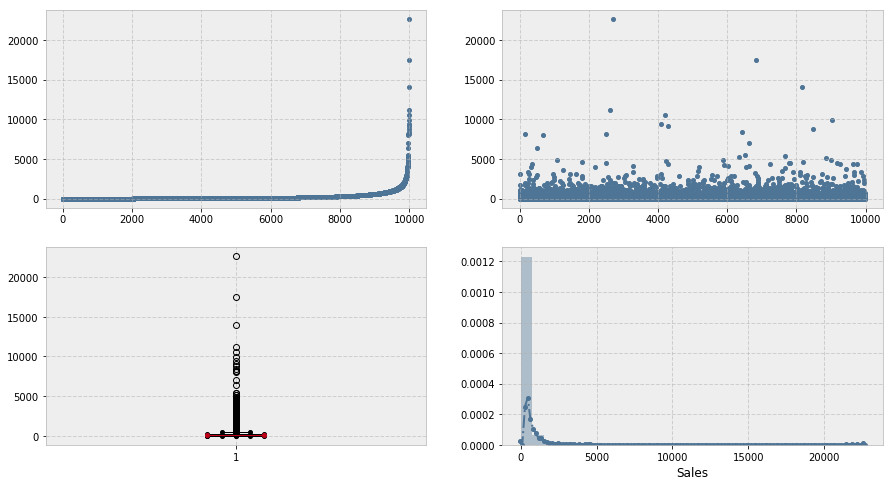

In [25]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
ax2.scatter(range(df.shape[0]), df['Sales'])
ax3.boxplot(df['Sales'])
sns.distplot(df['Sales'], bins=30)

In [27]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


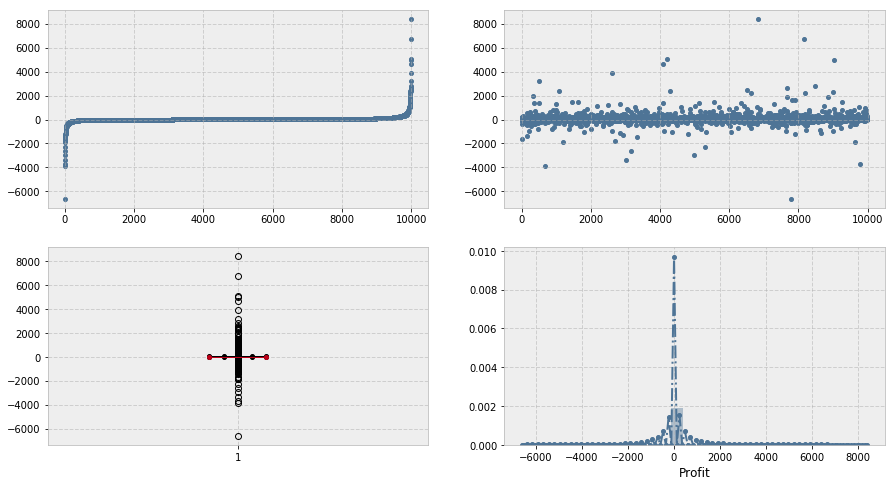

In [24]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
ax2.scatter(range(df.shape[0]), df['Profit'])
ax3.boxplot(df['Profit'])
sns.distplot(df['Profit'], bins=30)

In [26]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


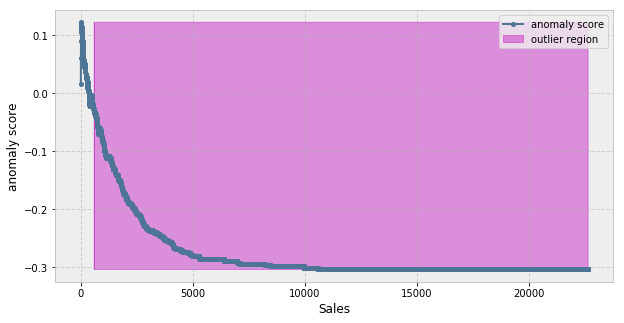

In [80]:
Xtrain  = df['Sales'].values.reshape(-1, 1)
Xtest = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)

isoForestModel = IsolationForest(n_estimators=100)
isoForestModel.fit(Xtrain)
anomalyScore = isoForestModel.decision_function(Xtest)
outlierLabel = isoForestModel.predict(Xtest)

plt.figure(figsize=(10,5))
plt.plot(Xtest, anomalyScore, label='anomaly score')
plt.fill_between(Xtest.T[0], np.min(anomalyScore), np.max(anomalyScore), 
    where=outlierLabel==-1, color='m', alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [74]:
data = {
    'testX': Xtest.reshape(-1), 
    'anomalyScore': list(anomalyScore), 
    'outlierLabel': list(outlierLabel),
}
pd.DataFrame(data=data).head()

,testX,anomalyScore,outlierLabel
0,0.444000,0.015610,1
1,2.709389,0.055463,1
2,4.974779,0.083370,1
3,7.240168,0.093313,1
4,9.505557,0.104800,1


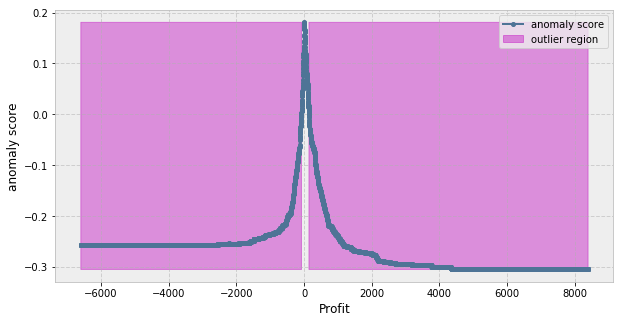

In [79]:
Xtrain = df['Profit'].values.reshape(-1, 1)
Xtest = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)

isoForestModel = IsolationForest(n_estimators=100)
isoForestModel.fit(Xtrain)
anomalyScore = isoForestModel.decision_function(Xtest)
outlierLabel = isoForestModel.predict(Xtest)

plt.figure(figsize=(10,5))
plt.plot(Xtest, anomalyScore, label='anomaly score')
plt.fill_between(Xtest.T[0], np.min(anomalyScore), np.max(anomalyScore), 
    where=outlierLabel==-1, color='m', alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

In [76]:
data = {
    'testX': Xtest.reshape(-1), 
    'anomalyScore': list(anomalyScore), 
    'outlierLabel': list(outlierLabel),
}
pd.DataFrame(data=data).head()

,testX,anomalyScore,outlierLabel
0,-6599.978000,-0.257672,-1
1,-6598.476954,-0.257672,-1
2,-6596.975908,-0.257672,-1
3,-6595.474862,-0.257672,-1
4,-6593.973815,-0.257672,-1


### Multivariate anomaly detection

Use Sales and Profit to create a daatset with two features.

### Outlier Detetction on Synthetic Data

Text(0, 0.5, 'Feature 2')

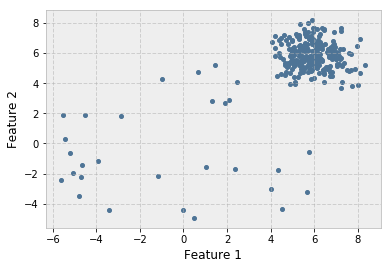

In [259]:
from pyod.utils.data import generate_data, get_outliers_inliers

# default value of contamination is 0.1 in most of the methods in PyOD
contamination = 0.1
X, y = generate_data(n_train=300, train_only=True, n_features=2, contamination=contamination)
XOutliers, XInliers = get_outliers_inliers(X, y)
nInliers = len(XInliers)
nOutliers = len(XOutliers)

#separate the two features and use it to plot the data 
f1 = X[:,[0]].reshape(-1,1)
f2 = X[:,[1]].reshape(-1,1)

plt.scatter(f1, f2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [256]:
classifiers = {
    # Proximity
    'KNN': KNN(),
    'Local Outlier Factor': LOF(),
    'Clustering Based Local Outlier Factor': CBLOF(),
    'Angle Based Outlier Detector': ABOD(),
    'Histogram Based Outlier Detector': HBOS(),
    # Ensemble 
    'Feature Bagging': FeatureBagging(),
    'Isolation Forest': IForest(),
    # Linear
    'One Class SVM': OCSVM(),
    'Principle Component Analysis': PCA(),
    'Minimum Covariance Determinant': MCD(),
}

No of Errors :  KNN 2
-0.9358133180551428 -13.642602249135317 -0.11399658532824176


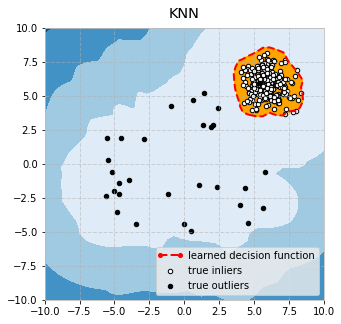

No of Errors :  Local Outlier Factor 33
-1.4434287270385702 -10.84816209374749 -0.9810885731837515


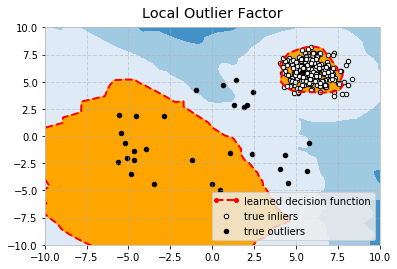

No of Errors :  Clustering Based Local Outlier Factor 2
-1.6008361815758594 -24.549876394797653 -0.11902677681315732


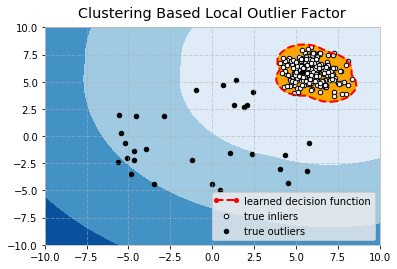

No of Errors :  Angle Based Outlier Detector 6
1.7713683461679752 1.025644333153248e-07 127290.30764107799


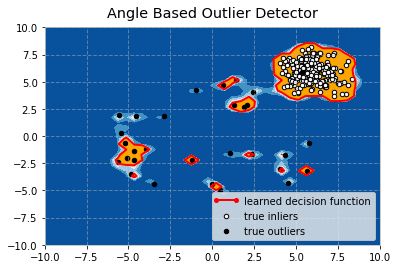

No of Errors :  Histogram Based Outlier Detector 10
-4.81416233737624 -6.607603262654639 -2.295122576952884


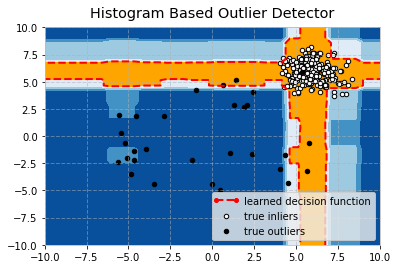

No of Errors :  Feature Bagging 20
-1.4401524497696365 -10.309095330931632 -0.9831178982926027


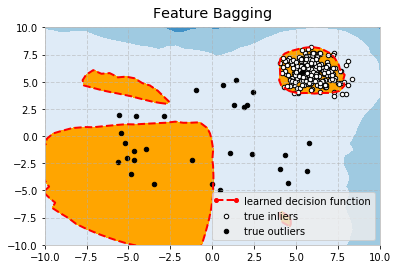

No of Errors :  Isolation Forest 4
-0.0492193905879185 -0.20744028043846519 0.140284947275104


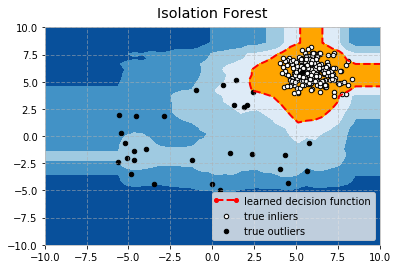

No of Errors :  One Class SVM 2
-22.664048460819153 -37.103740908489996 2.398274784633813


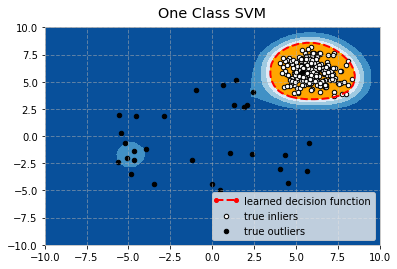

No of Errors :  Principle Component Analysis 6
-13.568657942307162 -74.68532768468263 -1.9699423725597163


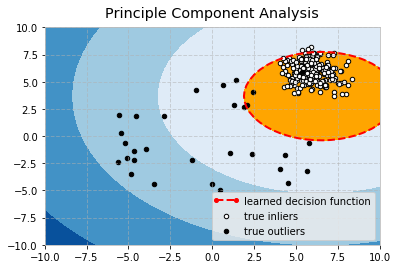

No of Errors :  Minimum Covariance Determinant 2
-10.653588057319599 -982.0231235150956 -0.1442484462346903


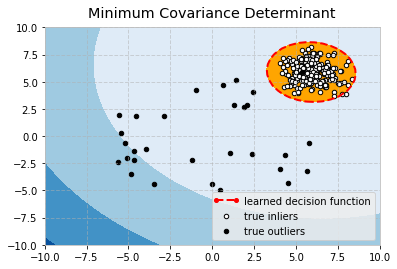

In [260]:
plt.figure(figsize=(5, 5))
xx , yy = np.meshgrid(np.linspace(-12, 12, 50), np.linspace(-12, 12, 50))

for clfName, clf in classifiers.items():
    clf.fit(X)
    scoresPred = clf.decision_function(X) * -1
    yPred = clf.predict(X)
    nErrors = (yPred != y).sum()
    print('No of Errors : ', clfName, nErrors)

    # visualization

    # threshold value to consider a datapoint inlier or outlier
    scoreThreshold = stats.scoreatpercentile(scoresPred, 100 * contamination)

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    print(scoreThreshold, Z.min(), Z.max())
    # fill blue colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), scoreThreshold, 5), cmap=plt.cm.Blues_r)
    # draw red contour line where anomaly score is equal to threshold
    a = plt.contour(xx, yy, Z, levels=[scoreThreshold], linewidths=2, colors='red')
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[scoreThreshold, Z.max()], colors='orange')
    # scatter plot of inliers with white dots
    b = plt.scatter(X[:-nOutliers, 0], X[:-nOutliers, 1], c='white', s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = plt.scatter(X[-nOutliers:, 0], X[-nOutliers:, 1], c='black', s=20, edgecolor='k')
    plt.axis('tight')
    plt.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right'
    )

    plt.title(clfName)
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.show() 

### Outlier Detection on Sales Data

In [277]:
df = pd.read_excel("Superstore.xls")
df.shape

(9994, 21)

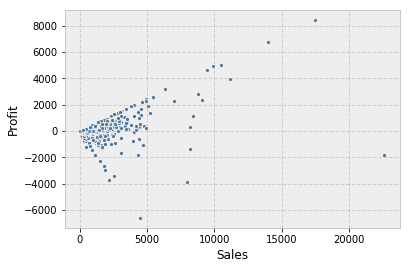

In [278]:
sns.scatterplot(x="Sales", y="Profit", data=df)

In [281]:
minmax = MinMaxScaler(feature_range=(0, 1))
df[['Sales','Profit']] = minmax.fit_transform(df[['Sales', 'Profit']])

X1 = df['Sales'].values.reshape(-1, 1)
X2 = df['Profit'].values.reshape(-1, 1)
X = np.concatenate((X1, X2), axis=1)

KNN    OUTLIERS :  43 INLIERS :  9951
-0.023170112450792937 -0.8013034484967865 -0.00024312159557413654


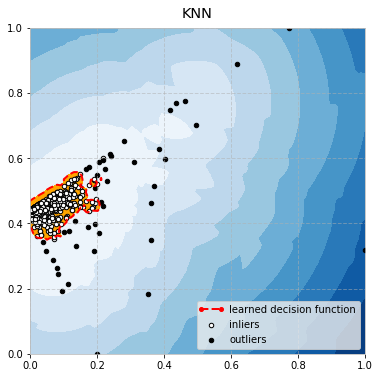

Clustering Based Local Outlier Factor    OUTLIERS :  50 INLIERS :  9944
-0.0801696381611878 -1.0178372412933565 -0.002527612255638572


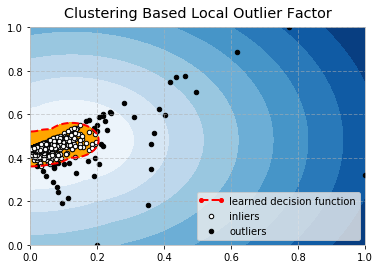

Histogram Based Outlier Detector    OUTLIERS :  32 INLIERS :  9962
-5.27668700476627 -6.629492321212186 6.643113519753044


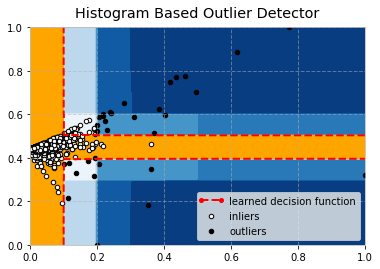

Isolation Forest    OUTLIERS :  50 INLIERS :  9944
-0.2200415084757802 -0.29665545036452157 0.07539583037940423


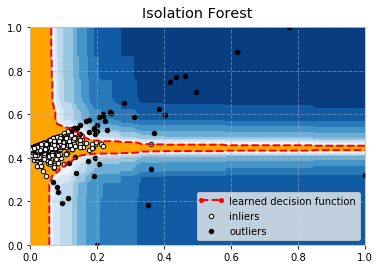

One Class SVM    OUTLIERS :  50 INLIERS :  9944
-66.18623155545119 -2363.576732462037 0.31906046400581545


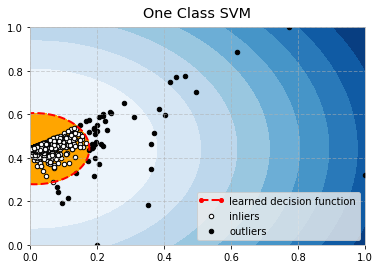

Principle Component Analysis    OUTLIERS :  50 INLIERS :  9944
-34.03795167119944 -261.8555279977269 -2.4718051435589627


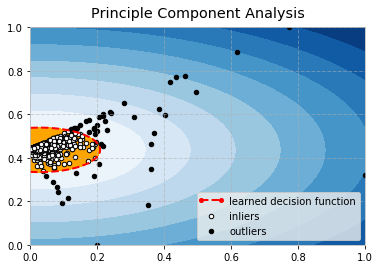

Minimum Covariance Determinant    OUTLIERS :  50 INLIERS :  9944
-40075.236572694295 -4877595.424290195 -36.40700349748746


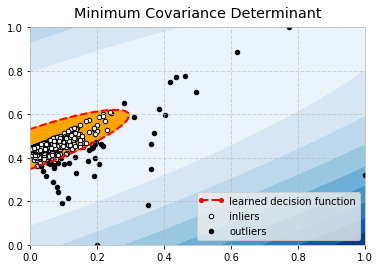

In [293]:
contamination = 0.005
classifiers = {
    # Proximity
    'KNN': KNN(contamination=contamination),
    'Clustering Based Local Outlier Factor': CBLOF(contamination=contamination),
    'Histogram Based Outlier Detector': HBOS(contamination=contamination),
    # Ensemble 
   'Isolation Forest': IForest(contamination=contamination),
    # Linear
    'One Class SVM': OCSVM(contamination=contamination),
    'Principle Component Analysis': PCA(contamination=contamination),
    'Minimum Covariance Determinant': MCD(contamination=contamination),
}

plt.figure(figsize=(6, 6))
# All the features are scaled to be between 0 and 1 (using MinMaxScaler)
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

for clfName, clf in classifiers.items():
    clf.fit(X)
    scoresPred = clf.decision_function(X) * -1
    yPred = clf.predict(X)
    nInliers = len(yPred) - np.count_nonzero(yPred)
    nOutliers = np.count_nonzero(yPred == 1)
    print(clfName, '  ', 'OUTLIERS : ', nOutliers, 'INLIERS : ', nInliers)
    
    # visualization ---------------
    df1 = df
    df1['outlier'] = yPred.tolist()
    inliersSales = np.array(df1.loc[df1['outlier'] == 0, 'Sales']).reshape(-1, 1)
    inliersProfit = np.array(df1.loc[df1['outlier'] == 0, 'Profit']).reshape(-1, 1)
    outliersSales = np.array(df1.loc[df1['outlier'] == 1, 'Sales']).reshape(-1, 1)
    outliersProfit = np.array(df1.loc[df1['outlier'] == 1, 'Profit']).reshape(-1, 1)

    # threshold value to consider a datapoint inlier or outlier
    scoreThreshold = stats.scoreatpercentile(scoresPred, 100 * contamination)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    print(scoreThreshold, Z.min(), Z.max())
    
    # fill blue colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), scoreThreshold, 10), cmap=plt.cm.Blues_r)
    # draw red contour line where anomaly score is equal to threshold
    a = plt.contour(xx, yy, Z, levels=[scoreThreshold], linewidths=2, colors='red')
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[scoreThreshold, Z.max()], colors='orange')
    
    # scatter plot of inliers with white dots
    b = plt.scatter(inliersSales, inliersProfit, c='white', s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = plt.scatter(outliersSales, outliersProfit, c='black', s=20, edgecolor='k')
    plt.axis('tight')
    plt.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'inliers', 'outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right'
    )

    plt.title(clfName)
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.show() 